<a href="https://colab.research.google.com/github/lovakumar12/MLR_nlp/blob/main/cosine%26jaccard_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Cosine Similarity: Explained in Layman's Terms*

Imagine you're comparing two people based on their preferences for movies. Each person rates a list of movies, and you want to figure out how similar their tastes are.

- *Person A* likes Action movies (8/10), Comedy movies (6/10), and Horror movies (2/10).
- *Person B* likes Action movies (7/10), Comedy movies (5/10), and Horror movies (3/10).

Now, if you plot these preferences as arrows (vectors) in a 3D space (one axis for each genre), the angle between the two arrows tells you how similar their preferences are:
- If the arrows point in the same direction (angle = 0°), they have identical preferences.
- If the arrows are perpendicular (angle = 90°), their preferences are unrelated.
- If the arrows point in opposite directions (angle = 180°), their preferences are completely opposite.

*Cosine similarity* measures this "alignment" between two vectors by calculating the cosine of the angle between them. The closer the cosine value is to 1, the more similar the two vectors are.



Technical Explanation: Step-by-Step
1. What is Cosine Similarity?
Cosine similarity is a metric used to measure how similar two vectors are, regardless of their magnitude. It calculates the cosine of the angle between two vectors in a multi-dimensional space.

The formula for cosine similarity is:

Cosine Similarity=
∥A∥∥B∥
A⋅B
​

Where:

A⋅B: Dot product of vectors A and B.
∥A∥: Magnitude (length) of vector A.
∥B∥: Magnitude (length) of vector B.
2. Why Use Cosine Similarity?
It focuses on the direction of the vectors rather than their magnitude.
It’s widely used in NLP (Natural Language Processing) to compare text documents or word embeddings because it ignores differences in document length or word frequency.

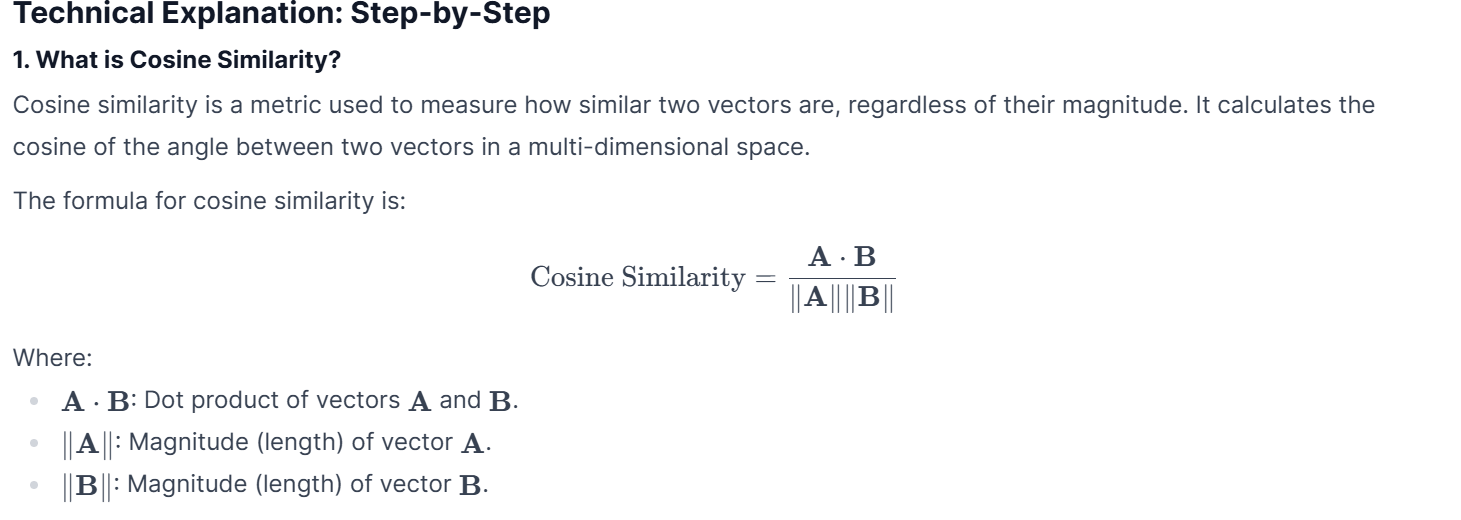

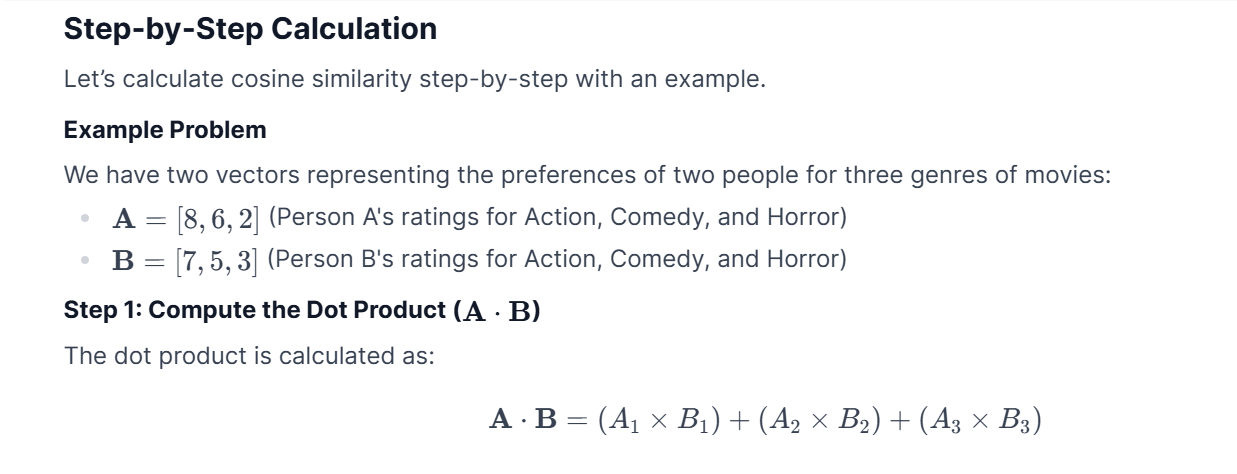

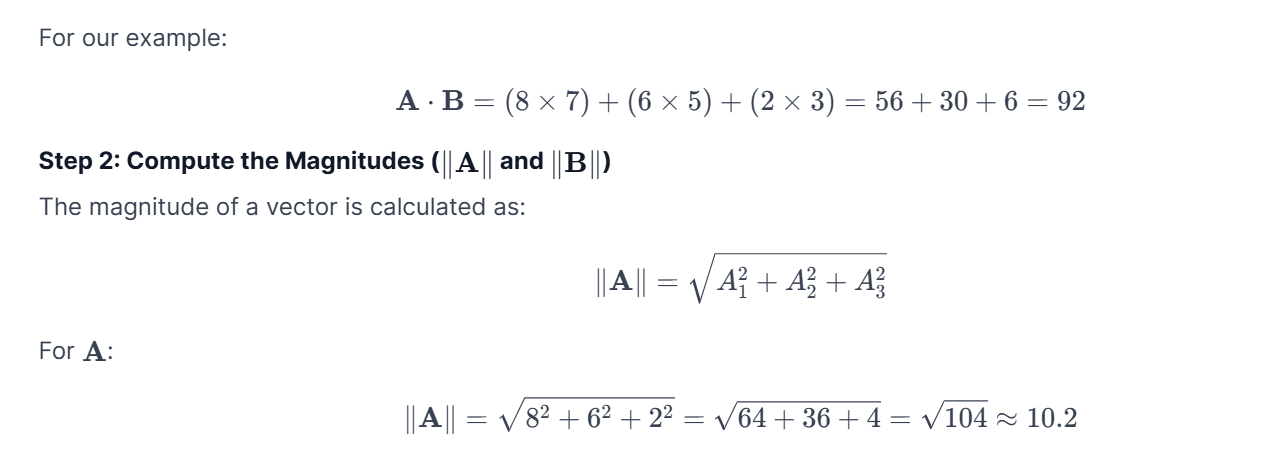

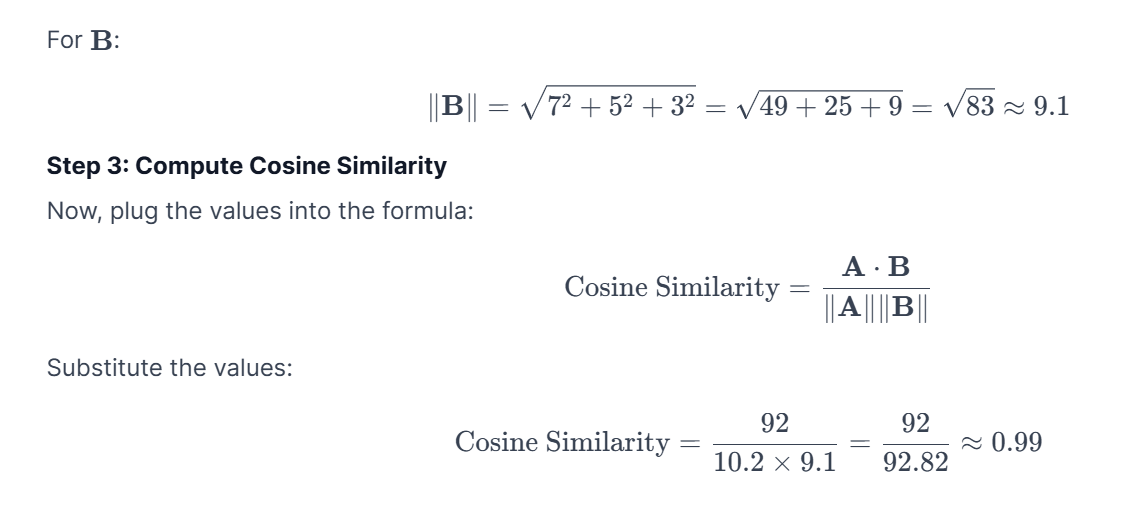

## by using NLP reviews


## using numpy


In [1]:
import numpy as np

# Define the vectors
A = np.array([8, 6, 2])
B = np.array([7, 5, 3])

# Compute dot product
dot_product = np.dot(A, B)

# Compute magnitudes
magnitude_A = np.linalg.norm(A)
magnitude_B = np.linalg.norm(B)

# Compute cosine similarity
cosine_similarity = dot_product / (magnitude_A * magnitude_B)
print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.9902209524921204


## for movie reviews

Review A : "The movie was fantastic! I loved the acting and the plot."
Review B : "The acting was great, and the plot was amazing."

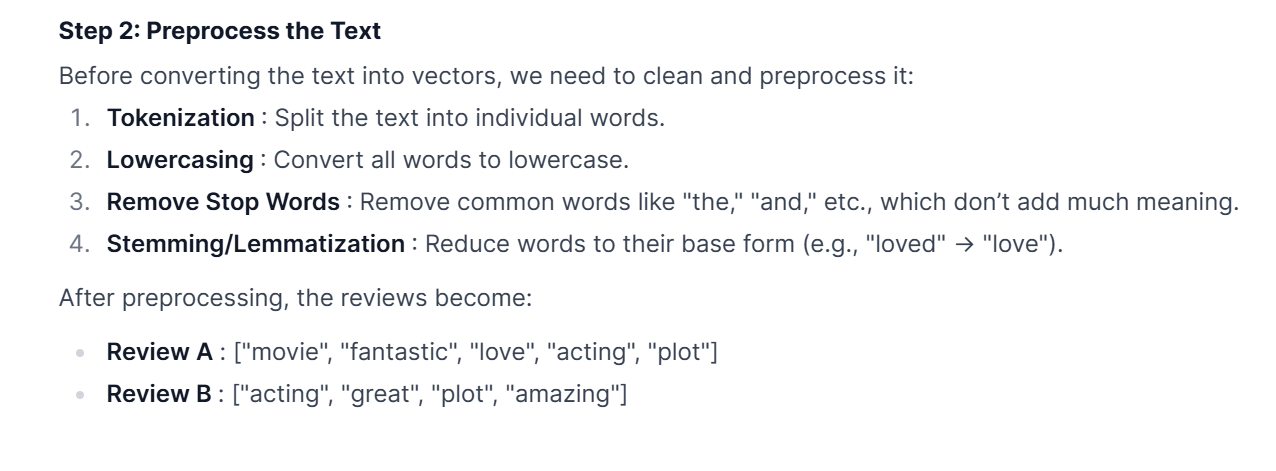

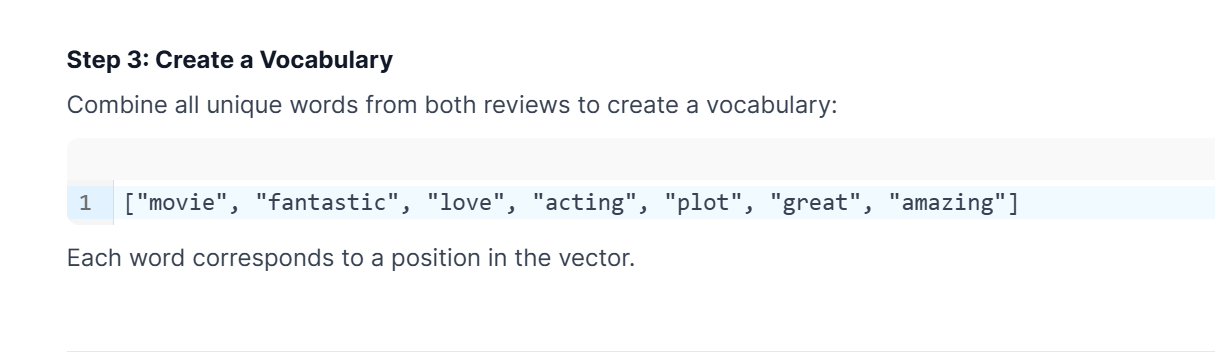

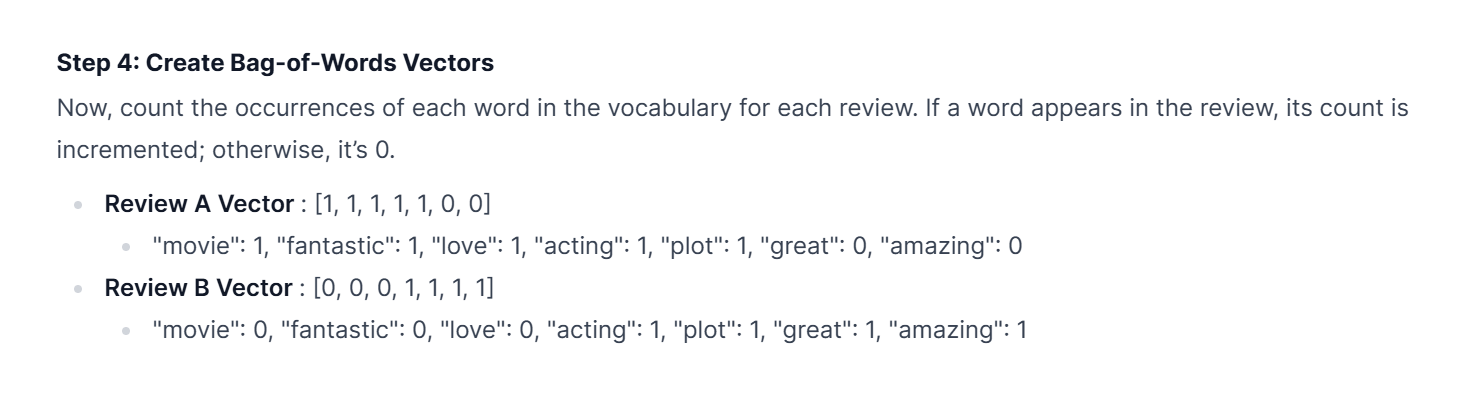

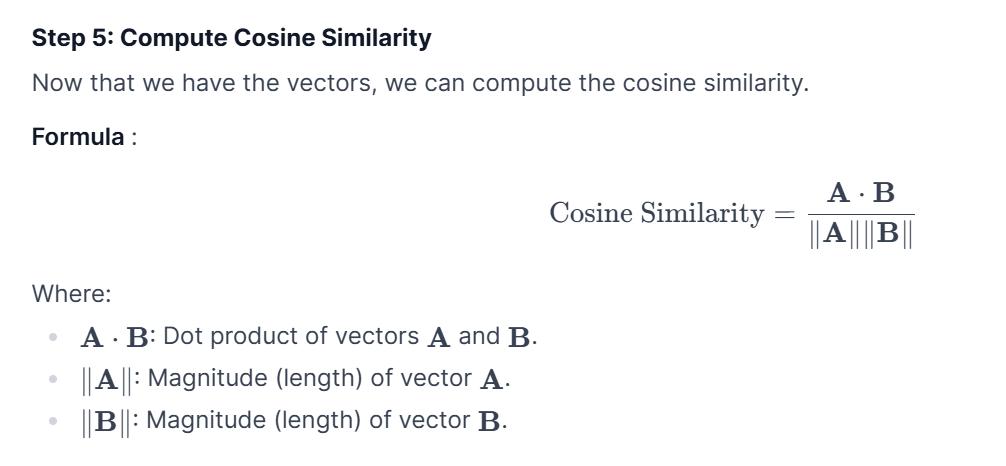

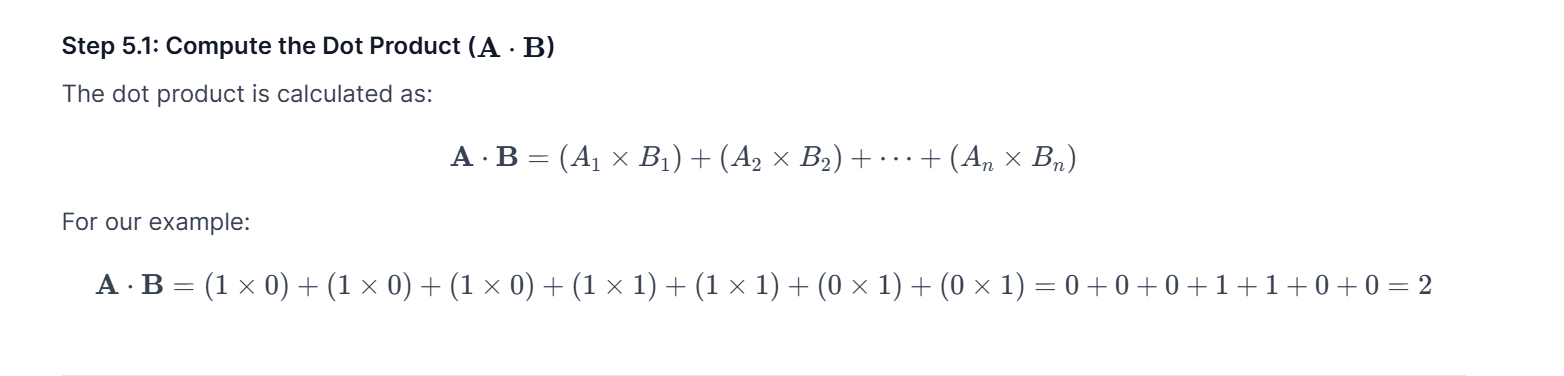

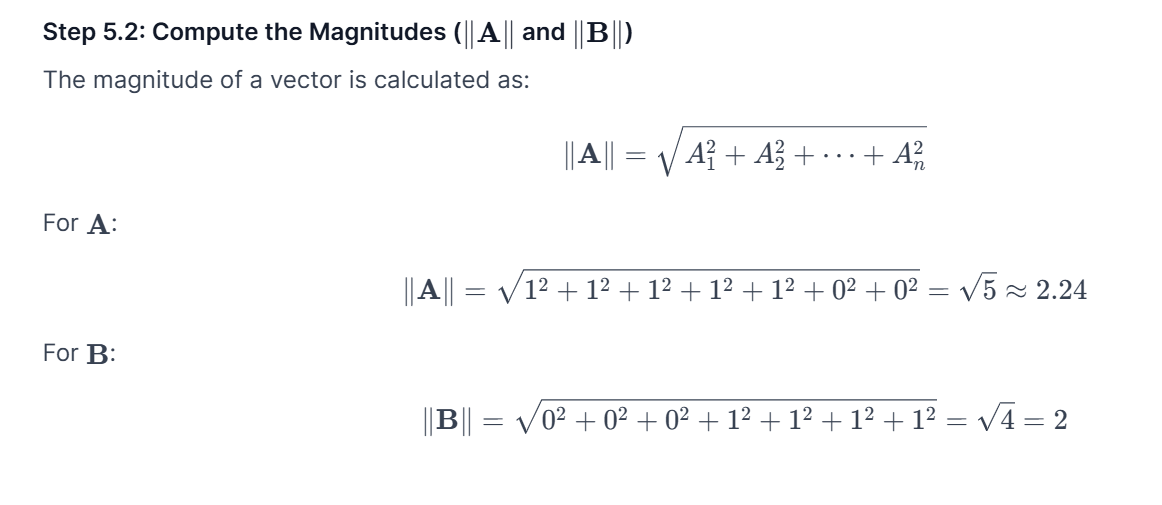

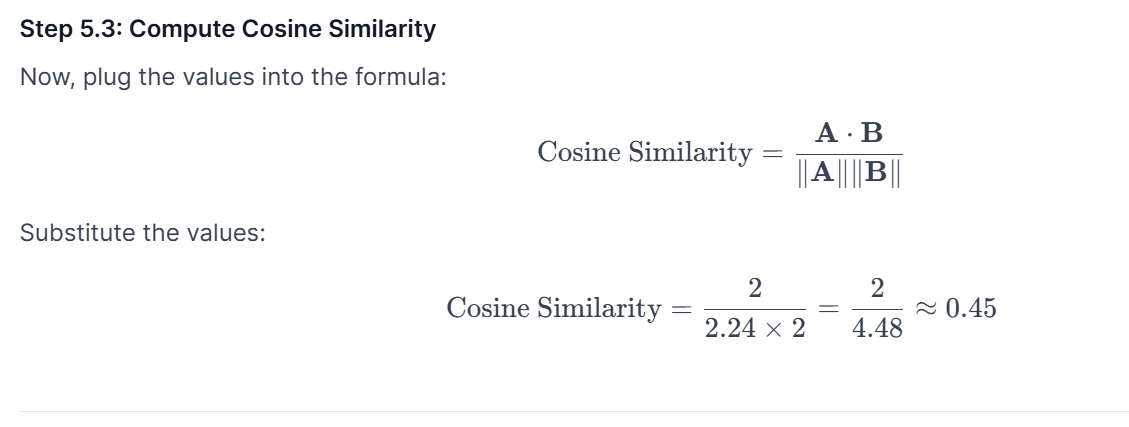

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## with preprocessing

In [3]:
import nltk
import string
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample Reviews
review_a = "The movie was fantastic! I loved the acting and the plot."
review_b = "The acting was great, and the plot was amazing."

# Preprocessing Function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove Punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Apply Preprocessing
processed_a = preprocess_text(review_a)
processed_b = preprocess_text(review_b)

print("Processed Review A:", processed_a)
print("Processed Review B:", processed_b)

# Convert into TF-IDF Vectors
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([processed_a, processed_b])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(vectors[0], vectors[1])[0][0]

print("Cosine Similarity:", round(cosine_sim, 3))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed Review A: movie fantastic loved acting plot
Processed Review B: acting great plot amazing
Cosine Similarity: 0.291


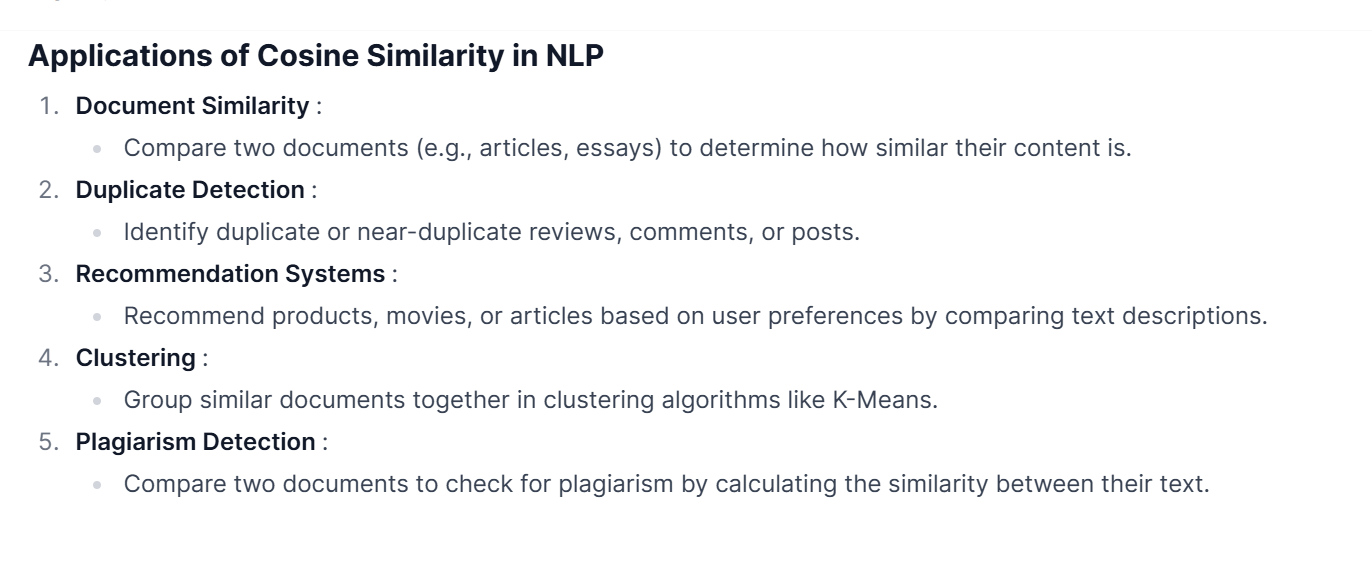

## jaccard similarity

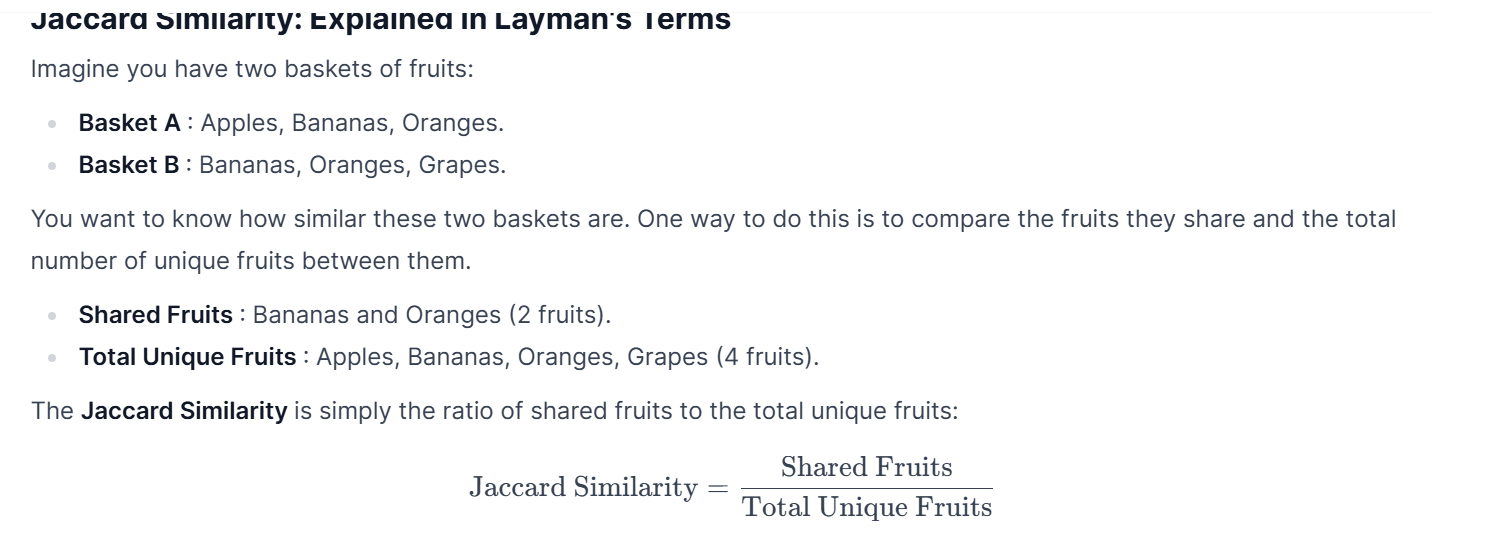

Jaccard Similarity= 2/4


 =0.5
This means the two baskets are 50% similar based on their contents.

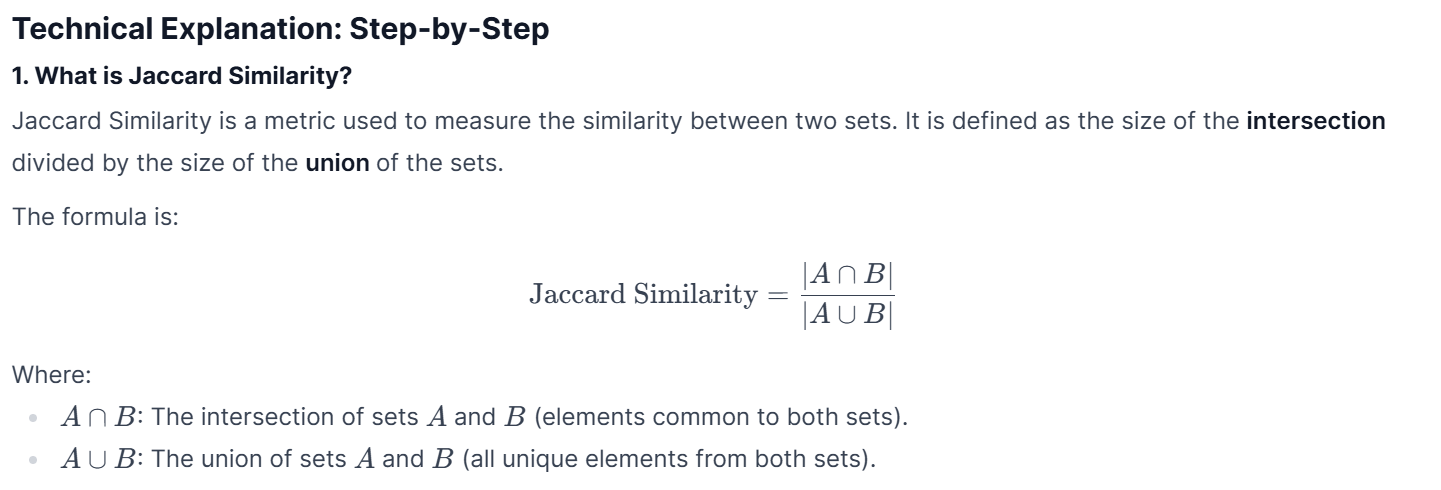

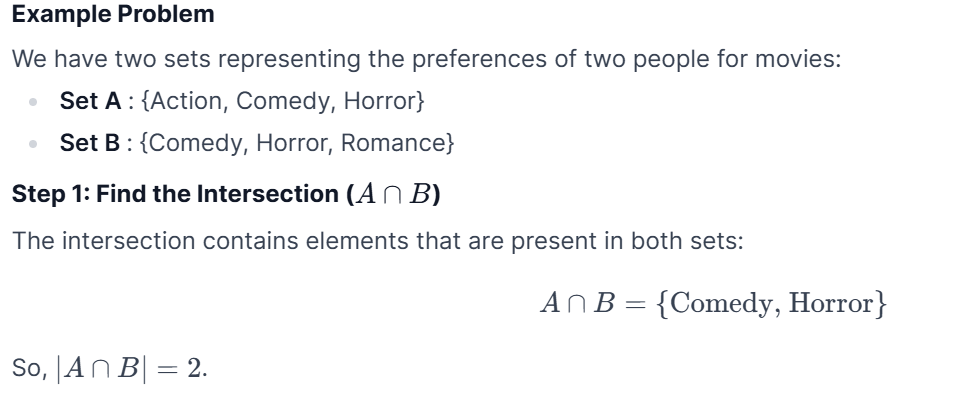

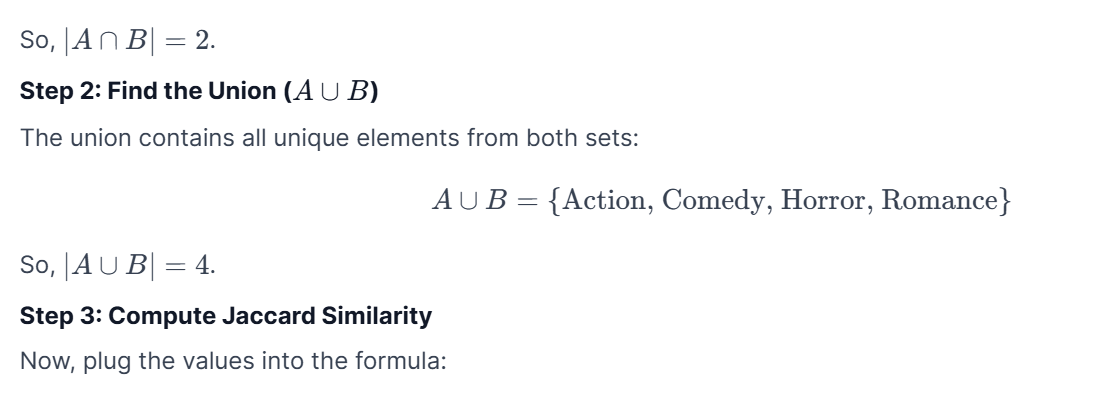

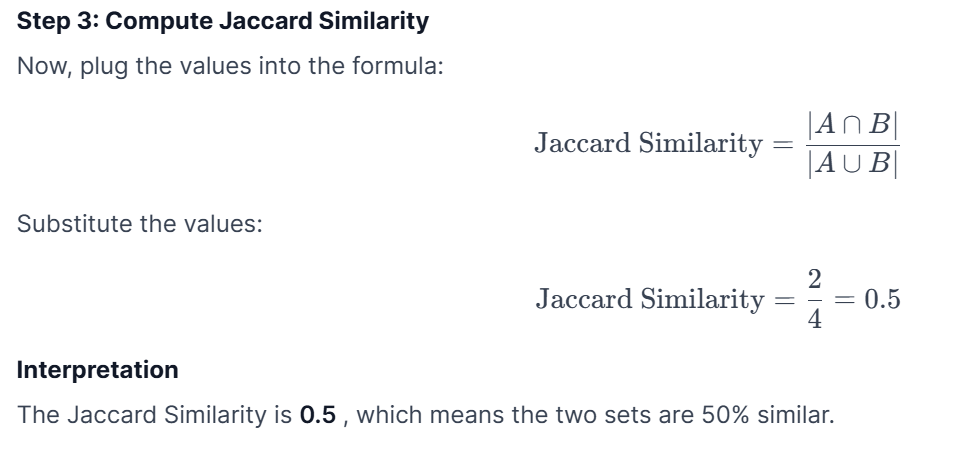

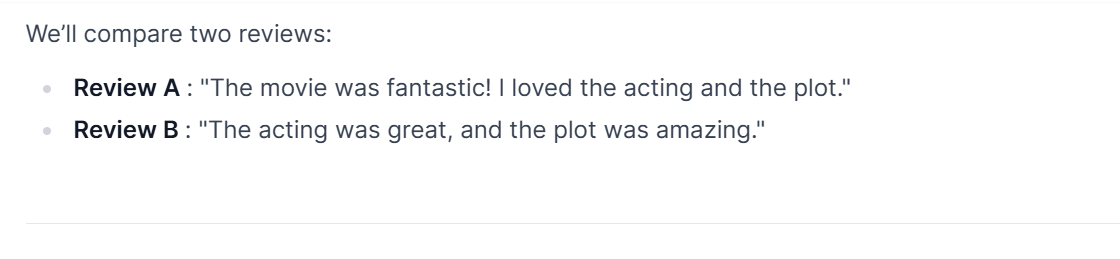

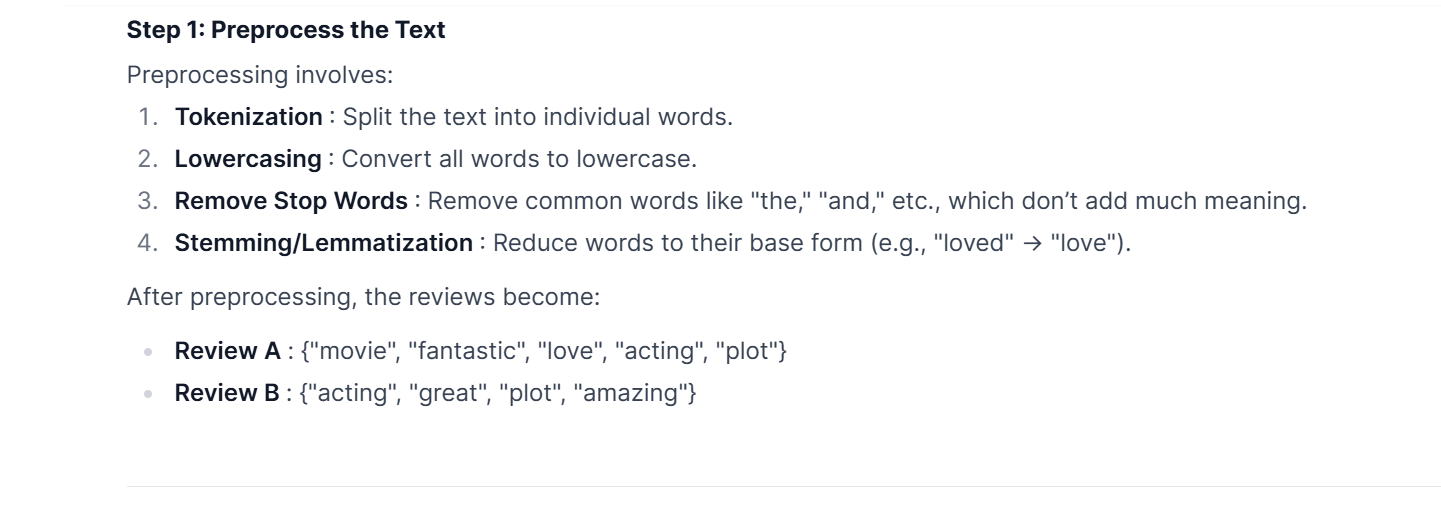

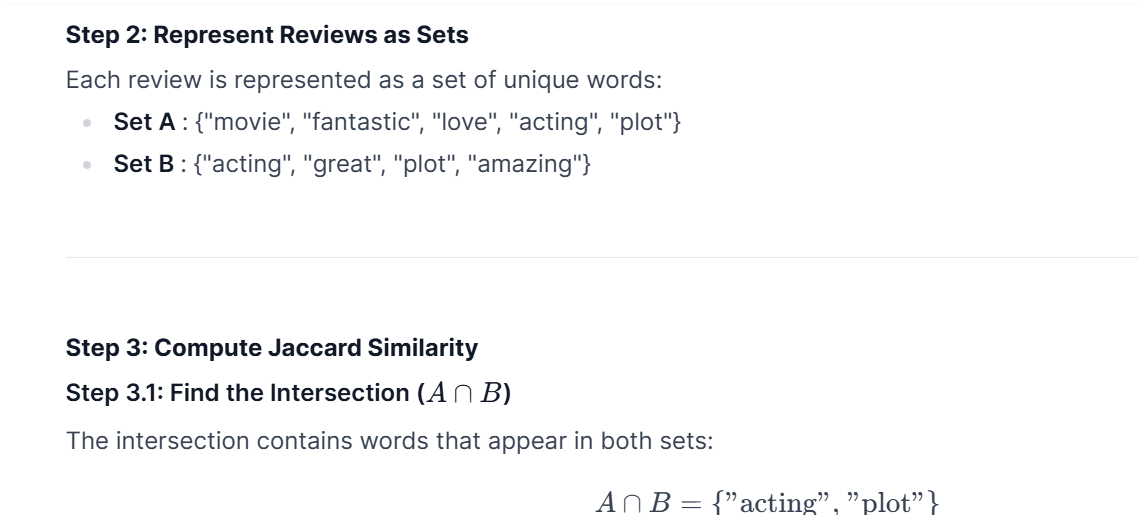

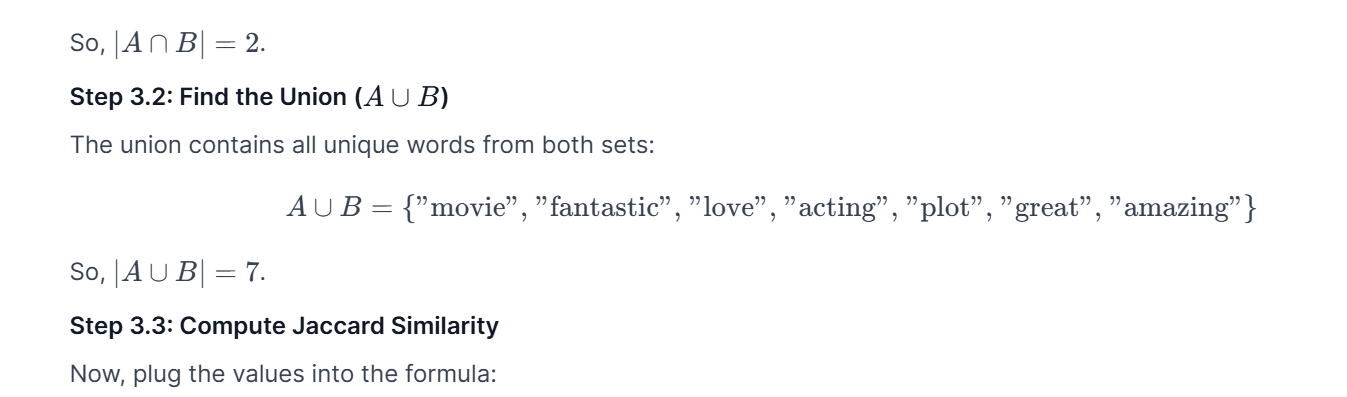

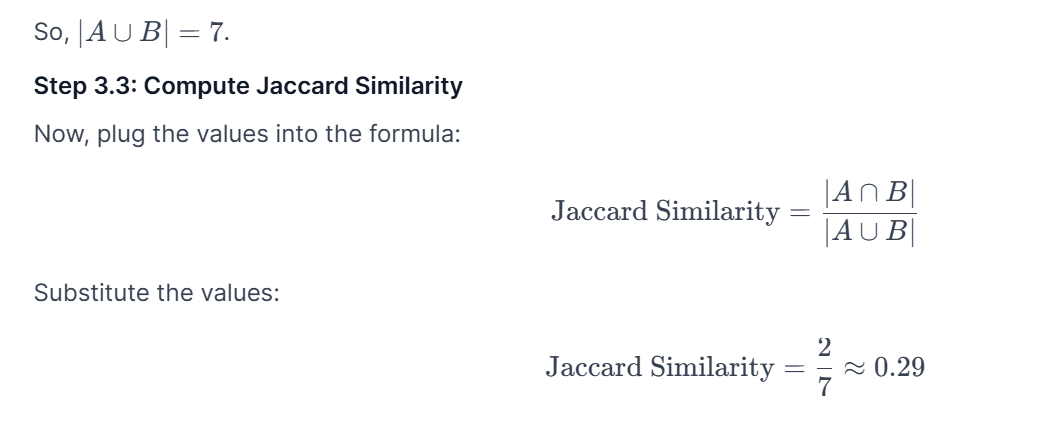

## with out preprocessing

In [4]:
# def jaccard_similarity(text1, text2):
#     # Convert to lowercase and split into words (tokenization)
#     words_text1 = set(text1.lower().replace("!", "").replace(".", "").split())
#     words_text2 = set(text2.lower().replace("!", "").replace(".", "").split())

#     # Compute intersection and union
#     intersection = words_text1.intersection(words_text2)
#     union = words_text1.union(words_text2)

#     # Compute Jaccard Similarity
#     similarity = len(intersection) / len(union)

#     return similarity

# # Given reviews
# review_a = "The movie was fantastic! I loved the acting and the plot."
# review_b = "The acting was great, and the plot was amazing."

# # Compute similarity
# similarity_score = jaccard_similarity(review_a, review_b)
# print(f"Jaccard Similarity: {similarity_score:.4f}")


## with preprocesing

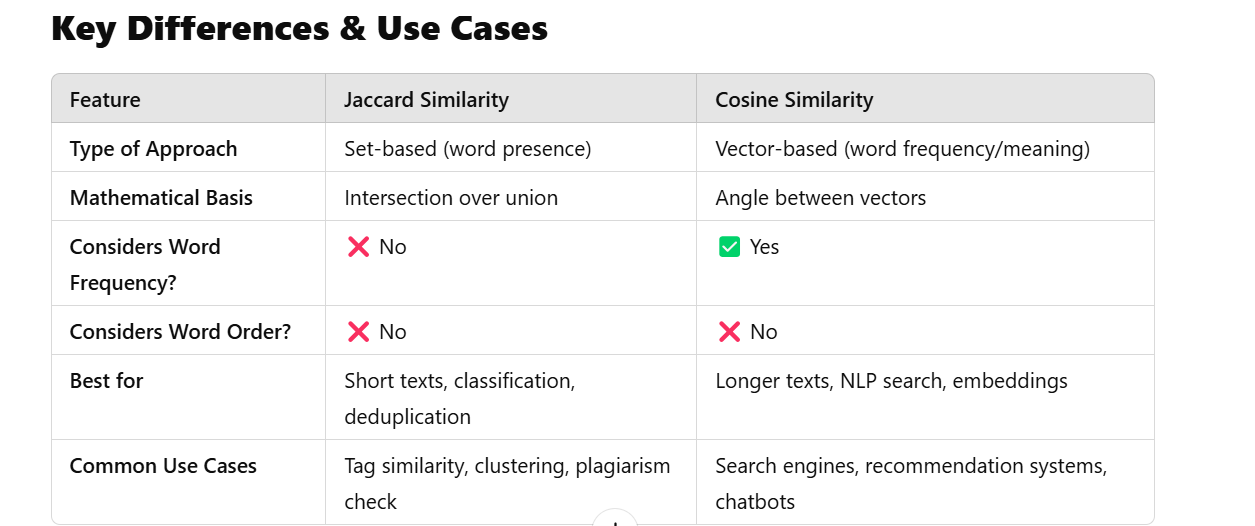

## apply the same technique on csv file


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [9]:
df.shape

(27481, 4)

In [10]:

# Apply preprocessing to both text columns
# Apply preprocessing to both text columns, handling potential NaN values
df['text1_clean'] = df['text'].astype(str).apply(preprocess_text) # Convert the column to string type before applying preprocess_text
df['text2_clean'] = df['selected_text'].astype(str).apply(preprocess_text) # Convert the column to string type before applying preprocess_text

print(df[['text1_clean', 'text2_clean']].head())

                      text1_clean      text2_clean
0                 responded going  responded going
1         sooo sad miss san diego         sooo sad
2                bos bullying ...         bullying
3           interview leave alone      leave alone
4  son put release already bought              son


In [11]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
tfidf_matrix1 = vectorizer.fit_transform(df['text1_clean'])
tfidf_matrix2 = vectorizer.transform(df['text2_clean'])  # Use transform, not fit_transform

In [12]:
# Compute cosine similarity between the two sets of vectors
cosine_similarities = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

# Add the similarity scores to the DataFrame
df['similarity_score'] = cosine_similarities.diagonal()

#print(df[['text1_clean', 'text2_clean', 'similarity_score']])

In [16]:
def jaccard_similarity(text1, text2):
    # Tokenize the texts into sets of words
    set1 = set(text1.split())
    set2 = set(text2.split())

    # Calculate Jaccard similarity
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    # Avoid division by zero
    if union == 0:
        return 0

    return intersection / union

# Compute Jaccard similarity for each pair of texts
df['jaccard_score'] = df.apply(lambda row: jaccard_similarity(row['text1_clean'], row['text2_clean']), axis=1)

#print(df[['text1', 'text2', 'jaccard_score']])

In [17]:
df.head()

,textID,text,selected_text,sentiment,text1_clean,text2_clean,similarity_score,jaccard_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,responded going,responded going,1.000000,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego,sooo sad,0.535921,0.400000
2,088c60f138,my boss is bullying me...,bullying me,negative,bos bullying ...,bullying,0.791472,0.333333
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone,leave alone,0.763914,0.666667
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son put release already bought,son,0.473126,0.200000
